In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os
import cv2   
import csv

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/train2.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/train3.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
temp = {}
c1, c2, c3, c4 = 0, 0, 0, 0
with open('/content/drive/MyDrive/AllLabels.csv', newline = '') as f:
  rd = csv.DictReader(f)
  for row in rd:
    filename, file_extension = os.path.splitext(row['ClipID'])
    if row['Engagement']=='0':
      c1+=1
      temp[filename]='0'
    elif row['Engagement']=='1':
      c2+=2
      temp[filename]='0'
    elif row['Engagement']=='2':
      c3+=3
      temp[filename]='1'
    elif row['Engagement']=='3':
      c4+=4
      temp[filename]='2'
print(c1, c2, c3, c4)

61 910 13266 15948


In [ ]:
pth = os.path.join('/tmp', 'train3')
print(pth)
labels = []
image_list = []
count = 0

user_list = os.listdir(pth)
for user in user_list:
  u_path = os.path.join(pth, user)
  user_clips = os.listdir(u_path)
  for clip in user_clips:
    clip_path = os.path.join(u_path, clip)
    images = os.listdir(clip_path)
    for i in images:
      img_path = os.path.join(clip_path, i)
      image =  cv2.imread(img_path)
      count+=1
      if  clip in temp:
        if image.shape == (48, 48, 3) and count%2==0:
          image.reshape(1, 48, 48, 3)
          image_list.append(image)
          labels.append(temp[clip])
  print(user + "Done")

In [ ]:
pth = os.path.join('/tmp', 'train2')
print(pth)
# labels = []
# image_list = []
count = 0

user_list = os.listdir(pth)
for user in user_list:
  u_path = os.path.join(pth, user)
  user_clips = os.listdir(u_path)
  for clip in user_clips:
    clip_path = os.path.join(u_path, clip)
    images = os.listdir(clip_path)
    for i in images:
      img_path = os.path.join(clip_path, i)
      image =  cv2.imread(img_path)
      count+=1
      if clip in temp:
        if image.shape == (48, 48, 3) and count%2==0:
          image.reshape(1, 48, 48, 3)
          image_list.append(image)
          labels.append(temp[clip])
  print(user + "Done")

In [ ]:
import sys                         
import numpy as np
import tensorflow as tf

In [ ]:
image_list = np.array(image_list)

In [ ]:
count = 0
for i in image_list:
  if i.shape == (48,48,3):
    count+=1
print(count)
print(type(image_list))

In [ ]:
labels = np.array(labels)

In [ ]:
opt = tf.keras.optimizers.Adam()

In [ ]:
def get_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(192, (3,3), input_shape = (48,48,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(192, (1,1), activation = "relu"),

    tf.keras.layers.Conv2D(192, (3,3), strides = (2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(96, (1,1), activation = "relu"),
    tf.keras.layers.Conv2D(96, (1,1), activation = "relu"),

    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(32, (3,3)),
    tf.keras.layers.BatchNormalization(),            
    tf.keras.layers.Activation("relu"),

    tf.keras.layers.Conv2D(3, (1,1)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation="softmax")

  ])                                                         

  model.compile(
        optimizer=opt,
        loss="categorical_crossentropy",                                               
        metrics=["accuracy"]
    )
  
  return model



In [ ]:
model = get_model()

In [ ]:
labels = tf.keras.utils.to_categorical(labels)

In [ ]:
p = np.random.permutation(len(labels))

In [ ]:
image_list = image_list[p]
labels = labels[p]

In [ ]:
history = model.fit(image_list, labels, batch_size=50, epochs=40, validation_split = 0.08)

Epoch 1/40
6793/6793 [==============================] - 349s 50ms/step - loss: 0.7553 - accuracy: 0.6189 - val_loss: 0.7096 - val_accuracy: 0.6469
Epoch 2/40
6793/6793 [==============================] - 338s 50ms/step - loss: 0.6927 - accuracy: 0.6586 - val_loss: 0.6559 - val_accuracy: 0.6811
Epoch 3/40
6793/6793 [==============================] - 337s 50ms/step - loss: 0.6561 - accuracy: 0.6808 - val_loss: 0.6203 - val_accuracy: 0.6971
Epoch 4/40
6793/6793 [==============================] - 336s 49ms/step - loss: 0.6309 - accuracy: 0.6955 - val_loss: 0.5844 - val_accuracy: 0.7207
Epoch 5/40
6793/6793 [==============================] - 336s 49ms/step - loss: 0.6097 - accuracy: 0.7069 - val_loss: 0.5635 - val_accuracy: 0.7309
Epoch 6/40
6793/6793 [==============================] - 336s 49ms/step - loss: 0.5944 - accuracy: 0.7168 - val_loss: 0.5497 - val_accuracy: 0.7429
Epoch 7/40
6793/6793 [==============================] - 336s 50ms/step - loss: 0.5812 - accuracy: 0.7229 - val_loss: 0

In [ ]:
model.save('my_model13.h5')
model.save_weights('my_model_weights13.h5')

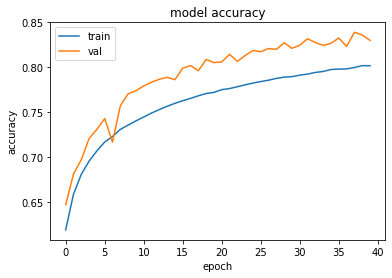

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

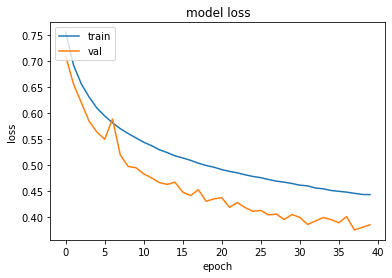

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()